In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import kmax as kx
import utility as util
from hierarchy import *

# Testing Tree Path Covers

In [2]:
def draw_tree(tree, layout, draw_path=True):
    nx.draw_networkx_nodes(tree, pos=layout, node_size=40)
    nx.draw_networkx_labels(tree, pos=layout, font_size=8)
    
    if draw_path:
        path_cover=util.path_cover(tree)
        nx.draw_networkx_edges(nx.DiGraph(tree), pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
        
        other_edges = [(u,v) for u,v in tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
        print(other_edges)
        nx.draw_networkx_edges(tree, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(tree, pos=layout)

### Random tree with edge weights in [0,1)

In [3]:
n = 25
tree = nx.random_labeled_tree(n)
tree = nx.bfs_tree(tree, 0)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

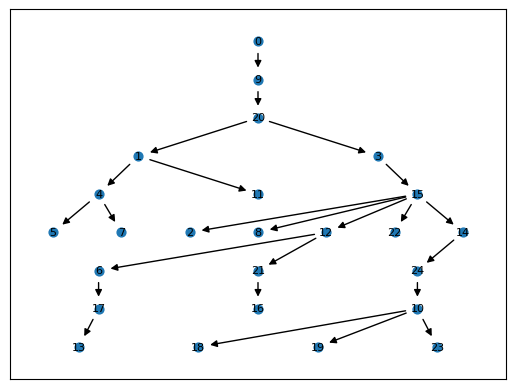

In [4]:
layout = hierarchye_pos(tree, 0)
draw_tree(tree, layout, draw_path=False)

0: (9.108451317883992, 0, 9, None)
9: (8.688362782603015, 0.4200885352809772, 20, None)
20: (8.688362782603015, -0.11834858103192936, 1, 3)
1: (1.3543208819529773, 0.8371841268108581, 4, 11)
3: (6.374414136791249, 0.12244363704793126, 15, None)
4: (1.0053209984580993, 0.3239211419782949, 5, 7)
11: (0, 0.025078741516582848, None, None)
15: (6.374414136791249, -0.05572656032751988, 2, 12)
5: (0, 0.6977532622679775, None, None)
7: (0, 0.3075677361901218, None, None)
2: (0, 0.9045929819713135, None, None)
8: (0, 0.3830737079271255, None, None)
12: (2.70058432105001, 0.8230796391395269, 21, 6)
22: (0, 0.28307639113248295, None, None)
14: (1.9461571946303997, 0.4528102412804129, 24, None)
6: (1.424577997653984, 0.12182550732350705, 17, None)
21: (0.7458702878008797, 0.4083105282716393, 16, None)
24: (1.4496020576010973, 0.49655513702930243, 10, None)
17: (0.9335521467281506, 0.4910258509258335, 13, None)
16: (0, 0.7458702878008797, None, None)
10: (1.410098197433427, 0.03950386016767038, 23,

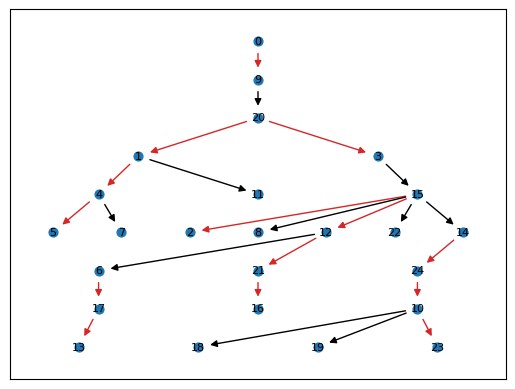

In [5]:
draw_tree(tree, layout)

In [6]:
nx.get_edge_attributes(tree, 'weight')

{(0, 9): 0.4200885352809772,
 (9, 20): 0.004095056016001908,
 (20, 1): 0.8622628683274409,
 (20, 3): 0.12244363704793126,
 (1, 4): 0.6314888781684167,
 (1, 11): 0.025078741516582848,
 (3, 15): 0.767353078812007,
 (4, 5): 0.6977532622679775,
 (4, 7): 0.3075677361901218,
 (15, 2): 0.9045929819713135,
 (15, 8): 0.3830737079271255,
 (15, 12): 0.9449051464630339,
 (15, 22): 0.28307639113248295,
 (15, 14): 0.4528102412804129,
 (12, 6): 0.12182550732350705,
 (12, 21): 0.4083105282716393,
 (14, 24): 0.49655513702930243,
 (6, 17): 0.4910258509258335,
 (21, 16): 0.7458702878008797,
 (24, 10): 0.5933115163121222,
 (17, 13): 0.9335521467281506,
 (10, 18): 0.4208949567071413,
 (10, 19): 0.5538076561444518,
 (10, 23): 0.8562905412889753}

### Unit edge weights

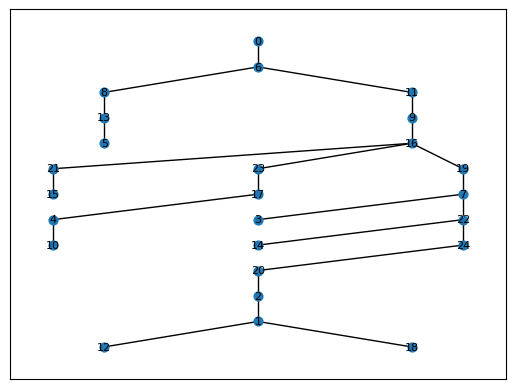

In [7]:
ones_tree = nx.random_labeled_tree(n)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

#ones_layout = nx.spring_layout(ones_tree)
ones_layout = hierarchye_pos(ones_tree, 0)
draw_tree(ones_tree, ones_layout, draw_path=False)

0: (19, 0, 6, None)
6: (19, 0, 11, 8)
8: (2, 1, 13, None)
11: (15, 1, 9, None)
13: (1, 1, 5, None)
9: (14, 1, 16, None)
5: (0, 1, None, None)
16: (14, 0, 23, 21)
21: (1, 1, 15, None)
23: (3, 1, 17, None)
19: (8, 1, 7, None)
15: (0, 1, None, None)
17: (2, 1, 4, None)
7: (7, 1, 3, 22)
4: (1, 1, 10, None)
3: (0, 1, None, None)
22: (6, 0, 24, 14)
10: (0, 1, None, None)
14: (0, 1, None, None)
24: (4, 1, 20, None)
20: (3, 1, 2, None)
2: (2, 1, 1, None)
1: (2, 0, 18, 12)
12: (0, 1, None, None)
18: (0, 1, None, None)
Path edges: [(6, 11), (6, 8), (8, 13), (11, 9), (13, 5), (16, 23), (16, 21), (21, 15), (23, 17), (19, 7), (17, 4), (7, 3), (4, 10), (22, 24), (22, 14), (24, 20), (20, 2), (1, 18), (1, 12)]
Total path length (x(root)): 19
Total path length (actual): 19
Difference: 0
[(0, 6), (1, 2), (7, 22), (9, 16), (16, 19)]


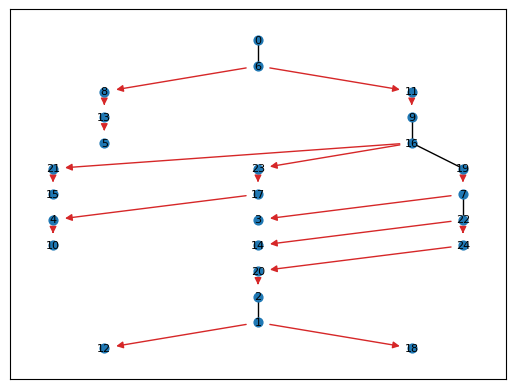

In [8]:
draw_tree(ones_tree, ones_layout)

In [9]:
util.path_cover_two(ones_tree)

{5: 0,
 15: 0,
 3: 0,
 10: 0,
 14: 0,
 12: 0,
 18: 0,
 1: 2,
 2: 2,
 20: 3,
 24: 4,
 22: 6,
 4: 1,
 7: 7,
 17: 2,
 19: 8,
 23: 3,
 21: 1,
 16: 14,
 9: 14,
 13: 1,
 11: 15,
 8: 2,
 6: 19,
 0: 19}